# Setting up drive enviournment

### Its inspired from 

In [ ]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My\ Drive/ECE657\ Project

/content/drive/My Drive/ECE657 Project


In [ ]:
import os
os.listdir()

['training.1600000.processed.noemoticon.csv',
 'baseword2vec',
 'baseword2vec_embedding_learnable',
 'w2v.model',
 'word2Vecme.model',
 'word2VecwithSTOP.model']

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Loading the dataset

In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

# Exploring the dataset size

In [ ]:
print("Dataset size:", len(data))

Dataset size: 1600000


Mapping target label to String
<br> 0 -> NEGATIVE
<br> 2 -> NEUTRAL
<br> 4 -> POSITIVE

In [ ]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(p):
    return decode_map[int(p)]

 lets look at target column now

In [ ]:
data.target

0          NEGATIVE
1          NEGATIVE
2          NEGATIVE
3          NEGATIVE
4          NEGATIVE
             ...   
1599995    POSITIVE
1599996    POSITIVE
1599997    POSITIVE
1599998    POSITIVE
1599999    POSITIVE
Name: target, Length: 1600000, dtype: object

In [ ]:
from collections import Counter
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
target_cnt = Counter(data.target)

Text(0, 0.5, 'Number of examples')

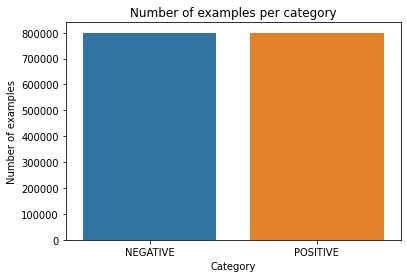

In [ ]:
ax = sns.barplot(x=list(target_cnt.keys()),y=list(target_cnt.values()))
ax.set_title('Number of examples per category')
ax.set_xlabel("Category")
ax.set_ylabel("Number of examples")

# Data cleaning

Importing the libraries for data cleaning


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

Data cleaning


In [ ]:
# downloading stopwords for nltk in collab
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#looking at first few texts in data
data['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

Lets look at stop_words that we are going to remove

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

lets look at the stemmer that we are going to use

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
        'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
        'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
        'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
        'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',  'only', 'own', 'same', 
        'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',  'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
removed = ['no', 'nor', 'not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

Lol! its calss object of nttk.stem.snowball as we defined

In [ ]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# Meaning of expression
# @ = @
# \S+ = (not whitespace) one or more
# | = or
# https = https once or none
# ?: = non capture group
# \S = (not whitespace) one or more
# | = or
# http = https once or more
# ?: = non capture group
# \S =  (not whitespace) one or more
# | = or
# [^A-Za-z0-9] : anything


stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # stemmer is not used as stem is kept as false
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
data.text = data.text.apply(lambda x: preprocess(x))

In [ ]:
data.head()

,target,ids,date,flag,user,text
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad see


# Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
print("TRAIN size:", len(data_train))
print("TEST size:", len(data_test))

TRAIN size: 1280000
TEST size: 320000


# Making a list of list of words in sentence

In [ ]:
%%time
documents = [_text.split() for _text in data_train.text]

CPU times: user 2.37 s, sys: 311 ms, total: 2.68 s
Wall time: 2.69 s


In [ ]:
# lets look at first five element
documents[0:5]

[['ya',
  'quot',
  'like',
  'palm',
  'pre',
  'touchstone',
  'charger',
  'readynow',
  'yes',
  'sounds',
  'good',
  'beer',
  'ready',
  'prelaunch'],
 ['felt', 'earthquake', 'afternoon', 'seems', 'epicenter'],
 ['ruffles', 'shirts', 'like', 'likey'],
 ['pretty',
  'bad',
  'night',
  'crappy',
  'morning',
  'fml',
  'buttface',
  'didnt',
  'say',
  'could',
  'go',
  'work',
  'today'],
 ['yeah', 'clear', 'view']]

# Lets make word2vec model from genism

In [ ]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM,Bidirectional
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools



# WORD2VEC model definition
<br> W2V_SIZE = 300 i.e we would be using 300 feature representation of words
<br> W2V_WINDOW = 7 i.e. Maximum distance between the current and predicted word within a sentence. (window in model definition)
<br> W2V_EPOCH = 32 ; would be used at the time of trianing
<br> W2V_MIN_COUNT = 10 :  Ignores all words with total frequency lower than this.(min_count in model definition)
<br> workers = 8; faster training with multicore machines


In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

# training w2v_model

### Lets first build a vocabulary

In [ ]:
try:
  w2v_model.build_vocab(documents)
except:
  pass

In [ ]:
len(w2v_model.wv.vocab)

30369

### Lets train the model

In [ ]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=32)

CPU times: user 20min 1s, sys: 3.48 s, total: 20min 4s
Wall time: 10min 19s


(263120125, 295270528)

# lets look at a few similar words

In [ ]:
w2v_model.most_similar("love")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('luv', 0.5863800048828125),
 ('loves', 0.5590203404426575),
 ('loved', 0.5284938812255859),
 ('adore', 0.5249035954475403),
 ('amazing', 0.5008914470672607),
 ('looove', 0.4876713156700134),
 ('awesome', 0.4590457081794739),
 ('miss', 0.4518846869468689),
 ('loveee', 0.44887465238571167),
 ('loooove', 0.4483523368835449)]

In [ ]:
w2v_model.most_similar("hate")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hates', 0.582089900970459),
 ('sucks', 0.4959036707878113),
 ('stupid', 0.48291563987731934),
 ('dislike', 0.46822670102119446),
 ('suck', 0.46545013785362244),
 ('h8', 0.4295975863933563),
 ('hating', 0.4273720979690552),
 ('ugh', 0.41794466972351074),
 ('despise', 0.4156067967414856),
 ('annoying', 0.40409672260284424)]

In [ ]:
w2v_model.most_similar("cat")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dog', 0.646408200263977),
 ('kitten', 0.6228753328323364),
 ('kitty', 0.5911570191383362),
 ('puppy', 0.49179938435554504),
 ('cats', 0.4780624508857727),
 ('kitties', 0.4724888205528259),
 ('hamster', 0.46165069937705994),
 ('pigeon', 0.4538411498069763),
 ('stray', 0.44955429434776306),
 ('kitteh', 0.43813571333885193)]

In [ ]:
w2v_model.most_similar("amazon")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('shipping', 0.45112746953964233),
 ('shipped', 0.4049015939235687),
 ('postage', 0.39302873611450195),
 ('copies', 0.3869944214820862),
 ('stock', 0.37921279668807983),
 ('itunes', 0.3670021891593933),
 ('zazzle', 0.3648422956466675),
 ('hmv', 0.3583901524543762),
 ('bluray', 0.3571857511997223),
 ('order', 0.3508510887622833)]

In [ ]:
w2v_model.most_similar("google")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bing', 0.479583740234375),
 ('search', 0.47482359409332275),
 ('xmpp', 0.46358829736709595),
 ('gmail', 0.46295660734176636),
 ('indexed', 0.4542398452758789),
 ('analytics', 0.45199495553970337),
 ('adsense', 0.45051756501197815),
 ('user', 0.4369664788246155),
 ('adwords', 0.43376433849334717),
 ('yahoo', 0.428270161151886)]

In [ ]:
w2v_model.most_similar("boy")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('girl', 0.5712612867355347),
 ('kid', 0.42793789505958557),
 ('boys', 0.4047055244445801),
 ('baby', 0.39736419916152954),
 ('guy', 0.37592747807502747),
 ('man', 0.3648235499858856),
 ('brother', 0.36205723881721497),
 ('son', 0.3596445620059967),
 ('munchkin', 0.3514896631240845),
 ('girls', 0.33767226338386536)]

# Lets start on training a NN based on the word2vec vocab

## Tokenizing the sentences

In [ ]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 290419
CPU times: user 15.1 s, sys: 142 ms, total: 15.2 s
Wall time: 15.2 s


## Preparing the dataset for feeding into neural network

In [ ]:
SEQUENCE_LENGTH = 140 
# KERAS
SEQUENCE_LENGTH = 140
EPOCHS = 8
BATCH_SIZE = 1024

### Padding sequences

In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(data_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(data_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 22.5 s, sys: 160 ms, total: 22.7 s
Wall time: 22.7 s


### Encoding the labels

In [ ]:
labels = data_train.target.unique().tolist()
labels.append("NEUTRAL")
labels

['POSITIVE', 'NEGATIVE', 'NEUTRAL']

In [ ]:
# we get labelEncoder from sklearn preprocessing ; it takes input as a list of categories and transforms them into classes 
encoder = LabelEncoder()
encoder.fit(data_train.target.tolist())

y_train = encoder.transform(data_train.target)
y_test = encoder.transform(data_test.target)

# reshaping to avoid 
# y_train shapes as (1280000,)
# y_test shapes as (320000,)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


### lets look at shapes for training and test sets with labels

In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 140)
y_train (1280000, 1)

x_test (320000, 140)
y_test (320000, 1)


In [ ]:
y_train[:10]

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

## Using trained Word2vec to define Embedding layer

### defining embedding matrix which can be used as a weight for training

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290419, 300)


### Lets see what tokenizer can do

In [ ]:
tokenizer.word_counts

OrderedDict([('ya', 8715),
             ('quot', 57678),
             ('like', 62879),
             ('palm', 493),
             ('pre', 1129),
             ('touchstone', 5),
             ('charger', 468),
             ('readynow', 2),
             ('yes', 14883),
             ('sounds', 7032),
             ('good', 72990),
             ('beer', 2023),
             ('ready', 11186),
             ('prelaunch', 13),
             ('felt', 1821),
             ('earthquake', 244),
             ('afternoon', 3358),
             ('seems', 4090),
             ('epicenter', 8),
             ('ruffles', 9),
             ('shirts', 554),
             ('likey', 147),
             ('pretty', 10149),
             ('bad', 21782),
             ('night', 34808),
             ('crappy', 969),
             ('morning', 27690),
             ('fml', 1433),
             ('buttface', 3),
             ('didnt', 5280),
             ('say', 13226),
             ('could', 17483),
             ('go', 59254),
     

In [ ]:
tokenizer.word_index

{'good': 1,
 'day': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'quot': 6,
 'today': 7,
 'work': 8,
 'going': 9,
 'love': 10,
 'got': 11,
 'lol': 12,
 'time': 13,
 'back': 14,
 'u': 15,
 'one': 16,
 'know': 17,
 'im': 18,
 'really': 19,
 'amp': 20,
 'see': 21,
 'night': 22,
 'still': 23,
 '2': 24,
 'well': 25,
 'new': 26,
 'want': 27,
 'think': 28,
 'home': 29,
 'thanks': 30,
 'oh': 31,
 'much': 32,
 'miss': 33,
 'need': 34,
 'last': 35,
 'morning': 36,
 'tomorrow': 37,
 'hope': 38,
 'great': 39,
 'twitter': 40,
 '3': 41,
 'haha': 42,
 'feel': 43,
 'sad': 44,
 'fun': 45,
 'wish': 46,
 'sleep': 47,
 'right': 48,
 'would': 49,
 'bad': 50,
 'happy': 51,
 'sorry': 52,
 'tonight': 53,
 'come': 54,
 'make': 55,
 'getting': 56,
 'way': 57,
 'though': 58,
 'gonna': 59,
 'nice': 60,
 'better': 61,
 'watching': 62,
 'yeah': 63,
 'bed': 64,
 'wait': 65,
 'could': 66,
 'week': 67,
 'school': 68,
 'people': 69,
 'hate': 70,
 'hey': 71,
 'days': 72,
 'even': 73,
 '4': 74,
 'yes': 75,
 'next': 76,
 'weekend

In [ ]:
w2v_model.save('word2VecwithSTOP.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### creating Embedding layer from word2vec

In [ ]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 300)          87125700  
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 87,287,121
Trainable params: 161,421
Non-trainable params: 87,125,700
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1125/1125 [==============================] - 101s 89ms/step - loss: 0.4600 - accuracy: 0.7796 - val_loss: 0.4454 - val_accuracy: 0.7900
Epoch 2/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.4399 - accuracy: 0.7923 - val_loss: 0.4417 - val_accuracy: 0.7918
Epoch 3/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.4455 - accuracy: 0.7892 - val_loss: 0.4462 - val_accuracy: 0.7905
Epoch 4/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.4247 - accuracy: 0.8012 - val_loss: 0.4394 - val_accuracy: 0.7931
Epoch 5/8
1125/1125 [==============================] - 101s 90ms/step - loss: 0.4134 - accuracy: 0.8080 - val_loss: 0.4373 - val_accuracy: 0.7944
Epoch 6/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.4051 - accuracy: 0.8125 - val_loss: 0.4385 - val_accuracy: 0.7939
Epoch 7/8
1125/1125 [==============================] - 101s 89ms/step - loss: 0.3980 - accuracy: 0.8165 - val_loss: 0.4421 -

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.3847 - accuracy: 0.8236 - val_loss: 0.4488 - val_accuracy: 0.7911
Epoch 2/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.3785 - accuracy: 0.8270 - val_loss: 0.4546 - val_accuracy: 0.7910
Epoch 3/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.3724 - accuracy: 0.8300 - val_loss: 0.4561 - val_accuracy: 0.7893
Epoch 4/8
1125/1125 [==============================] - 100s 89ms/step - loss: 0.3667 - accuracy: 0.8332 - val_loss: 0.4618 - val_accuracy: 0.7887
Epoch 5/8
1125/1125 [==============================] - 99s 88ms/step - loss: 0.3612 - accuracy: 0.8360 - val_loss: 0.4671 - val_accuracy: 0.7870
Epoch 6/8
1125/1125 [==============================] - 99s 88ms/step - loss: 0.3560 - accuracy: 0.8390 - val_loss: 0.4761 - val_accuracy: 0.7858
Epoch 7/8
1125/1125 [==============================] - 99s 88ms/step - loss: 0.3336 - accuracy: 0.8510 - val_loss: 0.4837 - va

In [ ]:
model.save("baseword2vec8aug1")

In [ ]:
    model1 = Sequential()
    model1.add(embedding_layer)
    model1.add(Bidirectional(LSTM(10, return_sequences = True)))
    model1.add(Bidirectional(LSTM(10)))
    model1.add(Dense((10)))
    model1.add(Dense(1, activation = "sigmoid"))

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model1.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=16,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/16
1125/1125 [==============================] - 131s 116ms/step - loss: 0.4718 - accuracy: 0.7727 - val_loss: 0.4547 - val_accuracy: 0.7839
Epoch 2/16
1125/1125 [==============================] - 130s 116ms/step - loss: 0.4476 - accuracy: 0.7876 - val_loss: 0.4487 - val_accuracy: 0.7880
Epoch 3/16
1125/1125 [==============================] - 129s 115ms/step - loss: 0.4408 - accuracy: 0.7918 - val_loss: 0.4458 - val_accuracy: 0.7895
Epoch 4/16
1125/1125 [==============================] - 129s 115ms/step - loss: 0.4366 - accuracy: 0.7946 - val_loss: 0.4437 - val_accuracy: 0.7908
Epoch 5/16
1125/1125 [==============================] - 129s 115ms/step - loss: 0.4336 - accuracy: 0.7963 - val_loss: 0.4427 - val_accuracy: 0.7919
Epoch 6/16
1125/1125 [==============================] - 129s 115ms/step - loss: 0.4313 - accuracy: 0.7975 - val_loss: 0.4425 - val_accuracy: 0.7916
Epoch 7/16
1125/1125 [==============================] - 129s 115ms/step - loss: 0.4294 - accuracy: 0.7990 - val_

In [ ]:
%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
320000/320000 [==============================] - 10s 32us/step

ACCURACY: 0.7903562784194946
LOSS: 0.44481917634010315


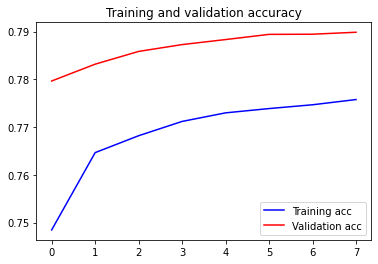

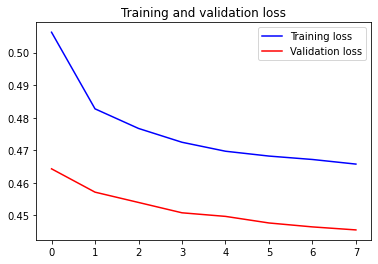

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = "NEUTRAL"
        SENTIMENT_THRESHOLDS= [0.5,1.5]
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
predict("I love the music")

{'elapsed_time': 0.16504907608032227,
 'label': 'NEUTRAL',
 'score': 0.9680590033531189}

### With trainable embedding layer

In [ ]:
embedding_layer2 = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=True)

In [ ]:
model2 = Sequential()
model2.add(embedding_layer2)
model2.add(Dropout(0.5))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 140, 300)          87125700  
_________________________________________________________________
dropout_3 (Dropout)          (None, 140, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 87,286,201
Trainable params: 87,286,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
%%time
history = model2.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1152000 samples, validate on 128000 samples
Epoch 1/8
1152000/1152000 [==============================] - 347s 301us/step - loss: 0.4962 - accuracy: 0.7555 - val_loss: 0.4579 - val_accuracy: 0.7851
Epoch 2/8


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1152000/1152000 [==============================] - 343s 298us/step - loss: 0.4579 - accuracy: 0.7817 - val_loss: 0.4476 - val_accuracy: 0.7914
Epoch 3/8
1152000/1152000 [==============================] - 343s 298us/step - loss: 0.4337 - accuracy: 0.7973 - val_loss: 0.4461 - val_accuracy: 0.7935
Epoch 4/8
1152000/1152000 [==============================] - 343s 298us/step - loss: 0.4088 - accuracy: 0.8120 - val_loss: 0.4557 - val_accuracy: 0.7904
Epoch 5/8
1152000/1152000 [==============================] - 342s 297us/step - loss: 0.3903 - accuracy: 0.8213 - val_loss: 0.4686 - val_accuracy: 0.7886
Epoch 6/8
1152000/1152000 [==============================] - 343s 298us/step - loss: 0.3769 - accuracy: 0.8286 - val_loss: 0.4784 - val_accuracy: 0.7862
Epoch 7/8
1152000/1152000 [==============================] - 342s 297us/step - loss: 0.3672 - accuracy: 0.8332 - val_loss: 0.4854 - val_accuracy: 0.7855
Epoch 8/8
1152000/1152000 [==============================] - 342s 297us/step - loss: 0.3584 

In [ ]:
model2.save("baseword2vec_embedding_learnable")

In [ ]:
%time
score = model2.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
320000/320000 [==============================] - 10s 32us/step

ACCURACY: 0.785743772983551
LOSS: 0.49356557998657224


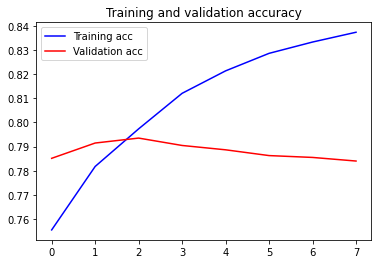

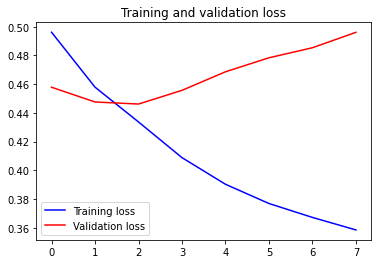

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = "NEUTRAL"
        SENTIMENT_THRESHOLDS= [0.5,1.5]
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model2.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
predict("I love the music")

{'elapsed_time': 0.1844191551208496,
 'label': 'NEUTRAL',
 'score': 0.9831187129020691}